# CSC421 Fall 2024 Assignment 4 
### Instructor: Brandon Haworth
#### Notebook Credit: George Tzanetakis
Jupyter Notebooks you encounter during the course were largely developed by Prof. Tzanetakis from a previous iteration of this course. I've since changed/developed them where necessary for my own iterations of CSC 421.

This notebook is based on the topics covered in **CHAPTER 14 - Probabilistic Reasoning over Time**, **Chapter 19 Learning**, and **Chapter 21 Deep Learning** from the book *Artificial Intelligence: A Modern Approach.* 

1. [6 Marks]: Generate HMM samples (Basic)   
2. [8 Marks]: Learning the HMM model from data (Expected) 
3. [14 Marks]: Maximum Likelihood, MAP, and Bayesian Learning (Advanced) 
4. [8 Marks]: Expectation Maximization (Expected)
5. [10 Marks]: Learning MLP Classifiers (Advanced)

 # Question 1 (Basic) - Generate HMM samples - 6 Marks


Explore hidden Markov models (HMMs) using the hmmlearn Python library:
[https://hmmlearn.readthedocs.io/en/latest/index.html]. 

You can use the code for the weather example in the probabilistic reasoning over time notebook we covered in class as a template/starting point for writing your code. 

The problem here is inspired by the use of HMMs in bioinformatics. There are several simplifications made to make it reasonable as part of an assignment. DNA sequences can be considered strings over an alphabet of 4 symbols/nucleobases **A,C,T,G (adenine, cytosine, thymine, guanine**. Parts of a DNA sequence are dense with C and G and other parts are sparse with C and G and it is of interest to biologists to identify these regions. 

We will model the **CG-dense**(CGD) and **CG-sparse** (CGS) as hidden states, and the nucleobases will be the observations. Through experimental data, we have the following information: 

1. The transition probability from CGD to CGS is 0.37 and the probability of staying in CGD is 0.63. The transition probability from CGS to CGD is similarly 0.37 with 0.63 being the probability of staying in CGS. 

2. The observation probabilities of CGD regions are A: 0.15, C:0.35, G: 0.35, and T:0.15. The observation probabilities of CGS regions are A: 0.40, C: 0.10, G: 0.10, T: 0.40 

3. You can assume that the initial state probabilities are the same (0.5) 

4. For visualization of the DNA sequences use the following color mapping: A: red, C: green, T: blue, G: yellow, and for CGD: black 
and CGS: white 


Your tasks:
1. Define this HMM model using the **hmmlearn** conventions.
2. Then use the created model to generate a sequence of 1000 samples (i.e. both hidden states and corresponding observations).
3. Use the colours above to visualize the sequence of samples. 



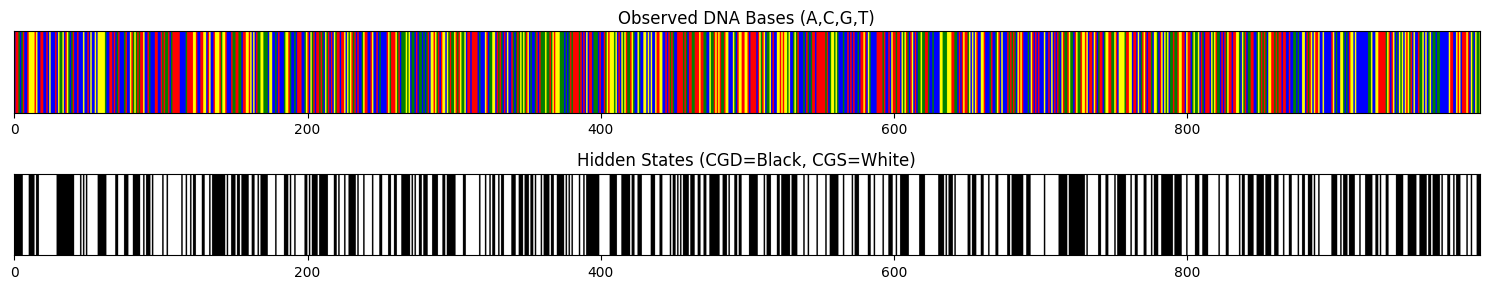

In [19]:
# Your answer goes here 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from hmmlearn.hmm import CategoricalHMM
model = CategoricalHMM(n_components=2)

# Initial probabilities
model.startprob_ = np.array([0.5, 0.5])

# Transition probabilities
model.transmat_ = np.array([
    [0.63, 0.37],  # CGD -> CGD, CGS
    [0.37, 0.63]   # CGS -> CGD, CGS
])

# Emission probabilities: A, C, G, T
model.emissionprob_ = np.array([
    [0.15, 0.35, 0.35, 0.15],  # CGD
    [0.40, 0.10, 0.10, 0.40]   # CGS
])

X, hidden_states = model.sample(1000)
observations = X.flatten()
obs_colors = {0: "red", 1: "green", 2: "yellow", 3: "blue"}
state_colors = {0: "black", 1: "white"}

obs_rgb_list = []
for o in observations:
    obs_rgb_list.append(mcolors.to_rgb(obs_colors[o]))
obs_rgb = np.array(obs_rgb_list)

state_rgb_list = []
for s in hidden_states:
    state_rgb_list.append(mcolors.to_rgb(state_colors[s]))
state_rgb = np.array(state_rgb_list)

plt.figure(figsize=(15, 3))

plt.subplot(2, 1, 1)
plt.imshow([obs_rgb], aspect='auto')
plt.title("Observed DNA Bases (A,C,G,T)")
plt.yticks([])

plt.subplot(2, 1, 2)
plt.imshow([state_rgb], aspect='auto')
plt.title("Hidden States (CGD=Black, CGS=White)")
plt.yticks([])

plt.tight_layout()
plt.show()

# Question 2 (Expected) - Learning the HMM model from data  - 8 Marks

1. Generate 10000 samples using the HMM defined in Q1 for generating DNA sequences.
2. Now learn a new HMM in an unsupervised fashion from the data you just generated, similarly to what we did with the weather example i.e. only use the observation samples not the "hidden" states for estimating the model using the fit function.
3. Contrast the original HMM from Q1 to the HMM estimated/learned from the data by comparing the transition and observation matrices. Print both matrices.
4. Generate a sequence of 1000 samples (i.e., both hidden and corresponding observations). Plot the generated sequence of 1000 samples from Q1 again, this time next to the 1000 samples you just generated, using the colours defined in Q1. Clearly label each figure (see the notebook from the lecture), so you can see the generations of states and observations from both the defined HMM in Q1 next to the learned HMM here.



=== ORIGINAL TRANSITION MATRIX ===
[[0.63 0.37]
 [0.37 0.63]]

=== LEARNED TRANSITION MATRIX ===
[[9.99828662e-01 1.71337764e-04]
 [7.49146871e-01 2.50853129e-01]]

=== ORIGINAL EMISSION MATRIX ===
[[0.15 0.35 0.35 0.15]
 [0.4  0.1  0.1  0.4 ]]

=== LEARNED EMISSION MATRIX ===
[[0.28044561 0.22929724 0.2217237  0.26853345]
 [0.51209237 0.24106727 0.12078391 0.12605644]]


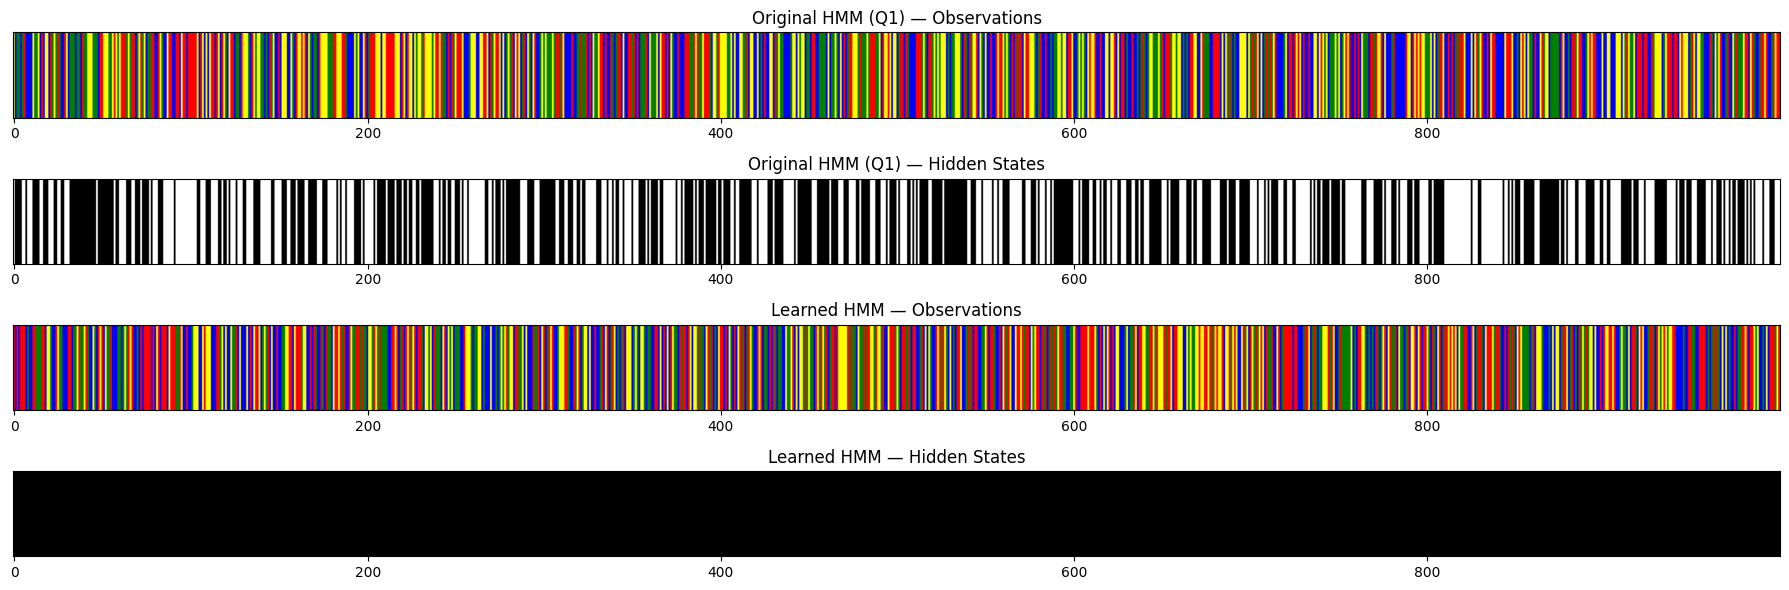

In [20]:
# Your answer goes here 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from hmmlearn.hmm import CategoricalHMM

# 1. DEFINE ORIGINAL HMM (from Q1)

model = CategoricalHMM(n_components=2)

# Initial state probabilities
model.startprob_ = np.array([0.5, 0.5])

# Transition matrix
model.transmat_ = np.array([
    [0.63, 0.37],  # CGD → CGD, CGS
    [0.37, 0.63]   # CGS → CGD, CGS
])

# Emission probabilities (A, C, G, T)
model.emissionprob_ = np.array([
    [0.15, 0.35, 0.35, 0.15],  # CGD
    [0.40, 0.10, 0.10, 0.40]   # CGS
])

# 2. GENERATE 10,000 SAMPLES FOR TRAINING

X_big, _ = model.sample(10000)  
training_data = X_big           

# 3. LEARN A NEW HMM (UNSUPERVISED)

learned_hmm = CategoricalHMM(n_components=2)
learned_hmm.fit(training_data)

# 4. PRINT ORIGINAL VS LEARNED MATRICES

print("\n=== ORIGINAL TRANSITION MATRIX ===")
print(model.transmat_)

print("\n=== LEARNED TRANSITION MATRIX ===")
print(learned_hmm.transmat_)

print("\n=== ORIGINAL EMISSION MATRIX ===")
print(model.emissionprob_)

print("\n=== LEARNED EMISSION MATRIX ===")
print(learned_hmm.emissionprob_)

# 5. GENERATE 1000 SAMPLES FROM BOTH MODELS
# Original
X1, states1 = model.sample(1000)
obs1 = X1.flatten()

# Learned
X2, states2 = learned_hmm.sample(1000)
obs2 = X2.flatten()

# 6. COLOR MAPPING

# Observation colors: A=0, C=1, G=2, T=3
obs_colors = {0: "red", 1: "green", 2: "yellow", 3: "blue"}

# Hidden states: CGD=0 (black), CGS=1 (white)
state_colors = {0: "black", 1: "white"}

# Convert sequences to RGB
obs1_rgb_list = []
for o in obs1:
    obs1_rgb_list.append(mcolors.to_rgb(obs_colors[o]))
obs1_rgb = np.array(obs1_rgb_list)

obs2_rgb_list = []
for o in obs2:
    obs2_rgb_list.append(mcolors.to_rgb(obs_colors[o]))
obs2_rgb = np.array(obs2_rgb_list)

states1_rgb_list = []
for s in states1:
    states1_rgb_list.append(mcolors.to_rgb(state_colors[s]))
states1_rgb = np.array(states1_rgb_list)

states2_rgb_list = []
for s in states2:
    states2_rgb_list.append(mcolors.to_rgb(state_colors[s]))
states2_rgb = np.array(states2_rgb_list)

# 7. PLOT BOTH MODELS SIDE-BY-SIDE

plt.figure(figsize=(18, 6))

# Original HMM Observations
plt.subplot(4, 1, 1)
plt.imshow([obs1_rgb], aspect='auto')
plt.title("Original HMM (Q1) — Observations")
plt.yticks([])

# Original HMM Hidden States
plt.subplot(4, 1, 2)
plt.imshow([states1_rgb], aspect='auto')
plt.title("Original HMM (Q1) — Hidden States")
plt.yticks([])

# Learned HMM Observations
plt.subplot(4, 1, 3)
plt.imshow([obs2_rgb], aspect='auto')
plt.title("Learned HMM — Observations")
plt.yticks([])

# Learned HMM Hidden States
plt.subplot(4, 1, 4)
plt.imshow([states2_rgb], aspect='auto')
plt.title("Learned HMM — Hidden States")
plt.yticks([])

plt.tight_layout()
plt.show()

# QUESTION 3 (Advanced) - Maximum Likelihood, MAP, and Bayesian Learning - 14 Marks

In this question, you are asked to come up with a variation to an existing example from the book. 

The example was covered in the notebook about learning probabilistic models and describes 5 bags of candy of two types (lime and cherry) as 5 hypotheses, you can use the code from that notebook. Come up with a scenario (be creative but realistic) in which each hypothesis is similarly selected with a prior probability. Your example should describe a realistic scenario i.e. not just have numbers but have some kind of interpretation. Details below!

Show, similarly to how the example is described in the book, how you would perform maximum a posteriori estimation, and Bayesian Learning given some successive samples from your model. Include plots in your example. Details below.

Your tasks
1. Clearly describe your scenario in markdown, with a similar level of detail as presented in class/in the textbook (see Learning Probabilistic Models part 2).
    1. Define 5 hypotheses
    2. Define 5 sample data observation sequences (HINT: to make some of your code simpler choose a single length for all of your observations, which should be at minimum 10) (NOTE: This is only interesting if you generate some sequences which may be associated with different hypotheses, you should make observations that reflect more that one of your hypotheses)
    3. Compute and show the likelihood of these hypotheses for each of your data observation sequences
    4. Define priors for each hypothesis and give some reasoning (relate to your made-up scenario)
3. Given some successive samples from your model (i.e., your data observation sequences)
    1. Plot the posterior probabilities of each hypothesis as they are updated over each data observation (you should have 5 plots with 5 lines on them, 5 observations with 5 hypotheses respectively). For each, data observation sequence note which hypothesis is chosen by the end of your updates that most likely explains what model generated your data.
    2. For each data observation sequence try to predict the next observation in the sequence using Bayes Learning (5 plots one for each of the data sequences where the probability of the next observation is given using Bayes)
    3. Repeat the above using MAP. Note like in the lecture notebook, you can plot MAP vs Bayes for each as long as you have a legend showing which curve is which.

*# Your description goes here as **Markdown**.* Use Latex appropriately for all mathematical notation.

Likelihoods P(sequence | H_i)

Sequence 1: [0 0 0 0 0 1 0 0 0 0 0 0]
  Length N = 12, number of defects k = 1
  H1 (theta=0.05): likelihood = 2.84400e-02
  H2 (theta=0.10): likelihood = 3.13811e-02
  H3 (theta=0.20): likelihood = 1.71799e-02
  H4 (theta=0.30): likelihood = 5.93198e-03
  H5 (theta=0.40): likelihood = 1.45119e-03

Sequence 2: [0 1 0 0 1 0 0 1 0 0 1 0]
  Length N = 12, number of defects k = 4
  H1 (theta=0.05): likelihood = 4.14638e-06
  H2 (theta=0.10): likelihood = 4.30467e-05
  H3 (theta=0.20): likelihood = 2.68435e-04
  H4 (theta=0.30): likelihood = 4.66949e-04
  H5 (theta=0.40): likelihood = 4.29982e-04

Sequence 3: [1 0 1 1 0 1 1 0 1 1 1 0]
  Length N = 12, number of defects k = 8
  H1 (theta=0.05): likelihood = 3.18167e-11
  H2 (theta=0.10): likelihood = 6.56100e-09
  H3 (theta=0.20): likelihood = 1.04858e-06
  H4 (theta=0.30): likelihood = 1.57530e-05
  H5 (theta=0.40): likelihood = 8.49347e-05

Sequence 4: [0 0 0 0 0 0 0 0 0 1 0 0]
  Length N = 12, number of defe

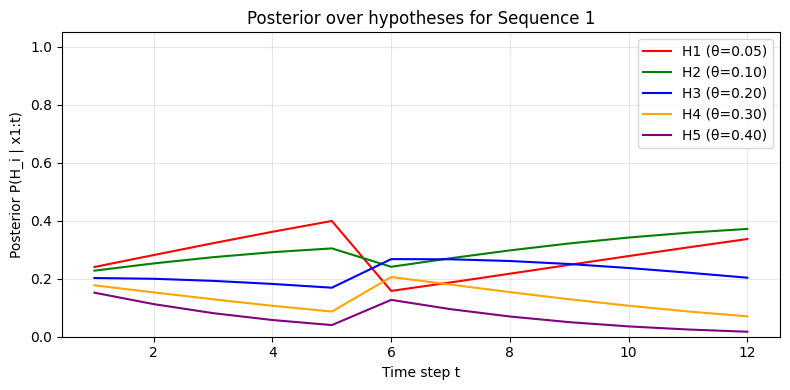

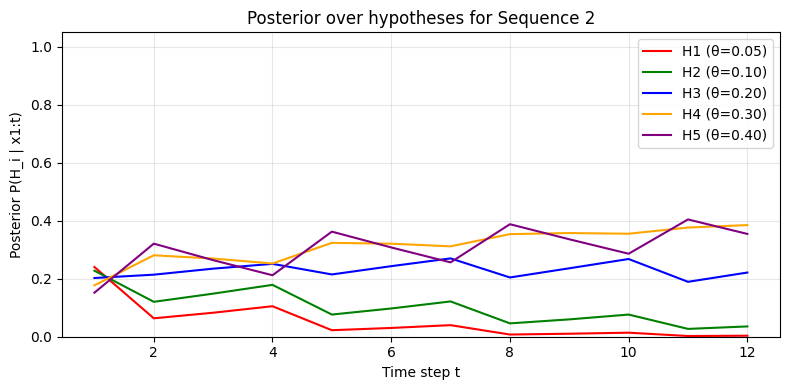

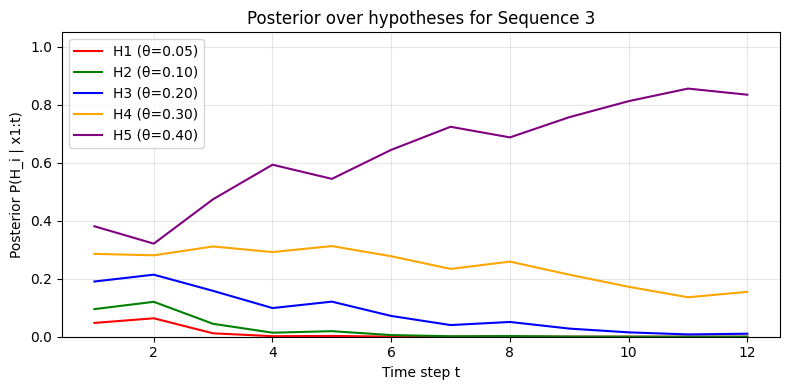

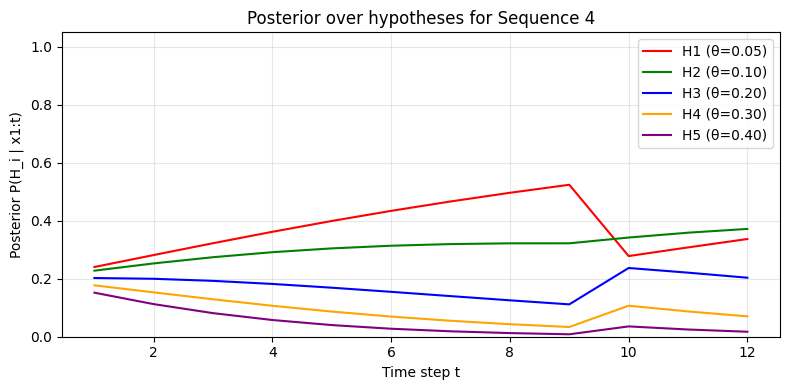

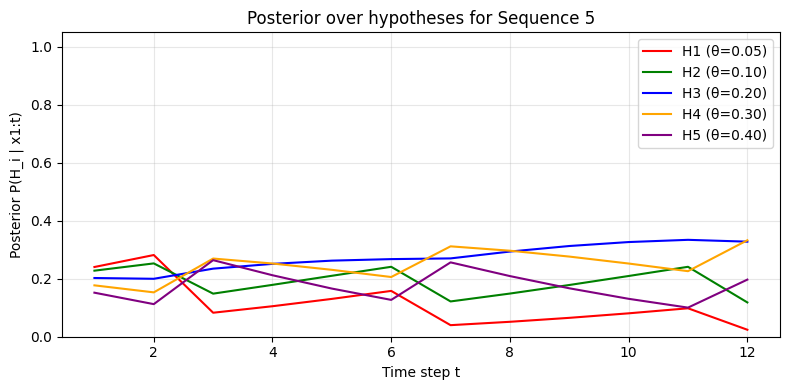

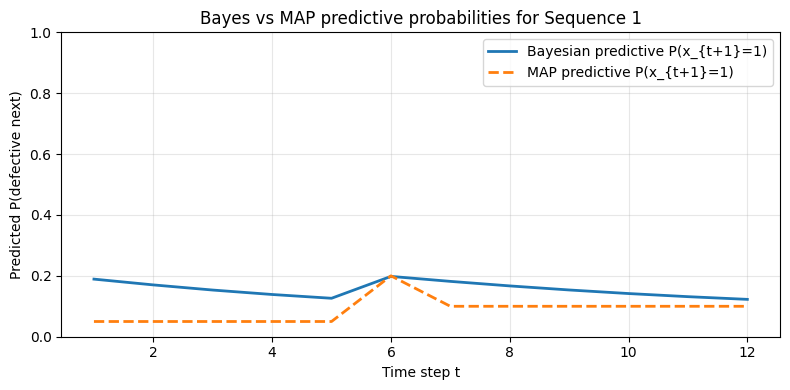

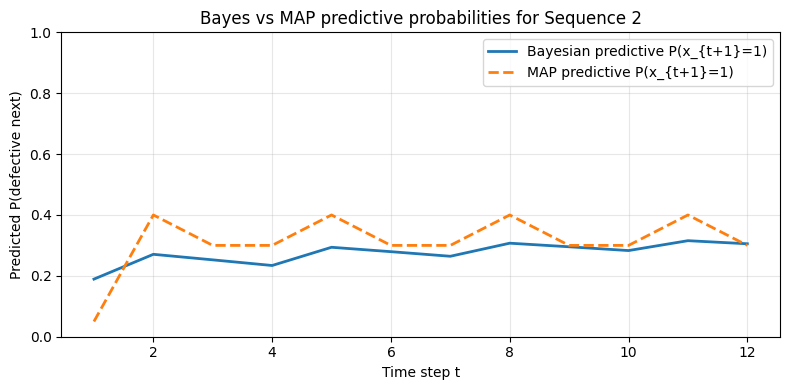

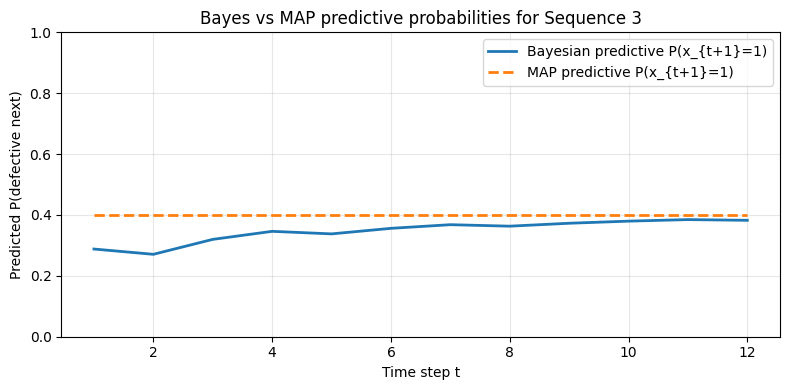

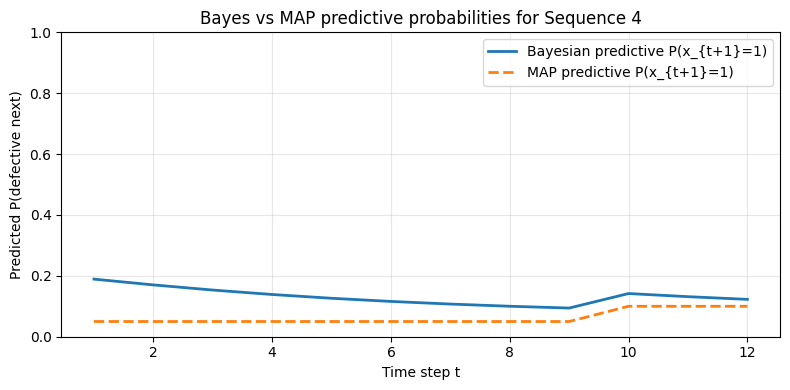

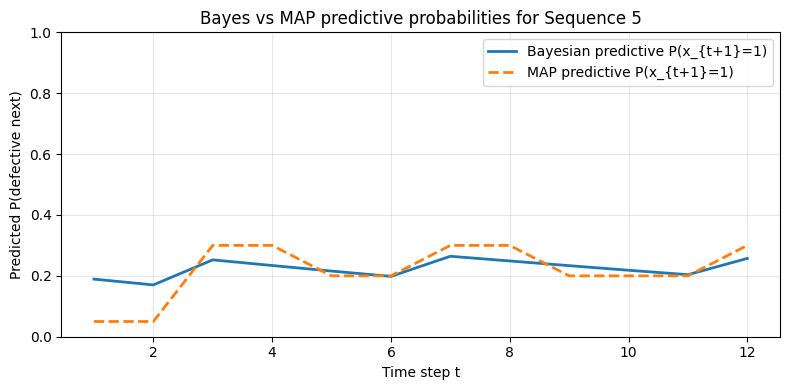

In [21]:
# The code portion of your answer goes here
import numpy as np
import matplotlib.pyplot as plt

# 1. Define hypotheses (machines)

# Defect probabilities theta_i for H1...H5
thetas = np.array([0.05, 0.10, 0.20, 0.30, 0.40])
num_hyp = len(thetas)

# Uniform prior over hypotheses
prior = np.ones(num_hyp) / num_hyp

# 2. Define 5 observation sequences (0 = good, 1 = defective)
sequences = [
    np.array([0,0,0,0,0,1,0,0,0,0,0,0]),  # seq 1
    np.array([0,1,0,0,1,0,0,1,0,0,1,0]),  # seq 2
    np.array([1,0,1,1,0,1,1,0,1,1,1,0]),  # seq 3
    np.array([0,0,0,0,0,0,0,0,0,1,0,0]),  # seq 4
    np.array([0,0,1,0,0,0,1,0,0,0,0,1])   # seq 5
]

seq_names = []
for i in range(len(sequences)):
    seq_names.append("Sequence " + str(i+1))

# 3. Likelihoods for each sequence under each hypothesis

def likelihood(sequence, theta):
    """
    P(sequence | theta) for Bernoulli model.
    sequence: array of 0/1
    theta: defect probability
    """
    n = len(sequence)
    k = np.sum(sequence)  # number of defective components (1s)
    return (theta**k) * ((1-theta)**(n-k))

print("Likelihoods P(sequence | H_i)")
for idx, seq in enumerate(sequences):
    print(f"\n{seq_names[idx]}: {seq}")
    n = len(seq)
    k = np.sum(seq)
    print(f"  Length N = {n}, number of defects k = {k}")
    for i, theta in enumerate(thetas):
        L = likelihood(seq, theta)
        print(f"  H{i+1} (theta={theta:.2f}): likelihood = {L:.5e}")

# 4. Posterior update over time + Bayesian vs MAP prediction

def update_posteriors(sequence, thetas, prior):
    T = len(sequence)
    num_hyp = len(thetas)
    
    post = np.zeros((T, num_hyp))
    bayes_pred = np.zeros(T)
    map_pred = np.zeros(T)
    
    # initialize posterior at t=0 with prior
    current_post = prior.copy()
    
    for t in range(T):
        x_t = sequence[t]  # 0 or 1
        
        # 1. Bayesian update: P(H_i | x_{1:t})
        # P(x_t | H_i) = theta_i^x_t * (1-theta_i)^(1-x_t)
        likelihoods_t = (thetas**x_t) * ((1 - thetas)**(1 - x_t))
        unnorm = likelihoods_t * current_post
        current_post = unnorm / unnorm.sum()
        
        post[t, :] = current_post
        
        # 2. Bayesian predictive prob for x_{t+1} = 1
        # P(x_{t+1}=1 | x_{1:t}) = sum_i theta_i * P(H_i | x_{1:t})
        bayes_pred[t] = np.sum(thetas * current_post)
        
        # 3. MAP predictive prob: use theta of the most probable hypothesis
        map_index = np.argmax(current_post)
        map_pred[t] = thetas[map_index]
    
    return post, bayes_pred, map_pred

all_posteriors = []
all_bayes_preds = []
all_map_preds = []

for seq in sequences:
    post, bayes_pred, map_pred = update_posteriors(seq, thetas, prior)
    all_posteriors.append(post)
    all_bayes_preds.append(bayes_pred)
    all_map_preds.append(map_pred)

# 5. Plot posteriors for each sequence

colors = ["red", "green", "blue", "orange", "purple"]

for idx, post in enumerate(all_posteriors):
    T = post.shape[0]
    plt.figure(figsize=(8, 4))
    for i in range(num_hyp):
        plt.plot(range(1, T+1), post[:, i], label=f"H{i+1} (θ={thetas[i]:.2f})", color=colors[i])
    plt.xlabel("Time step t")
    plt.ylabel("Posterior P(H_i | x1:t)")
    plt.title(f"Posterior over hypotheses for {seq_names[idx]}")
    plt.ylim(0, 1.05)
    plt.legend(loc="best")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# 6. Plot Bayes vs MAP predictive probability for each sequence

for idx, (bayes_pred, map_pred) in enumerate(zip(all_bayes_preds, all_map_preds)):
    T = len(bayes_pred)
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, T+1), bayes_pred, label="Bayesian predictive P(x_{t+1}=1)", linewidth=2)
    plt.plot(range(1, T+1), map_pred, label="MAP predictive P(x_{t+1}=1)", linestyle="--", linewidth=2)
    plt.xlabel("Time step t")
    plt.ylabel("Predicted P(defective next)")
    plt.title(f"Bayes vs MAP predictive probabilities for {seq_names[idx]}")
    plt.ylim(0, 1.0)
    plt.legend(loc="best")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# QUESTION 4 (Expected) - Expectation Maximization - 8 Marks

In this question, you are asked to extend the toy Expectation Maximization algorithm introduced in the learning probabilistic models notebook to handle 3 classes and more than one parameter (each class has its own two parameters: mu and sigma of the Gaussian normal).

Below we generate data for three normally distributed classes of reaction times for the general population, gamers, and pilots. Your task is to:
1. Complete the E step that samples from the pdf of each class and updates the estimates samples for each class
2. Complete the M step that estimates parameters from the samples
3. Once EM has been run, generate 1000 samples from the EM estimated distribution parameters for each class
4. Plot these generated distributions in the same way shown below for the distributions with MLE parameters

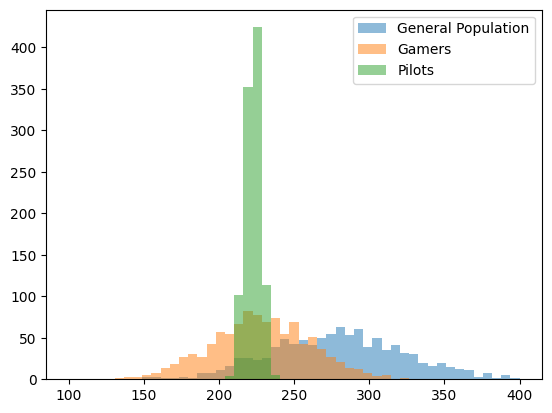

MLE Estimates of Normal Distrubiton parameters from generated data
General population mu:  279.3618293219615  ; sigma:  44.78277094768521
Gamer population mu:  227.70205053477503  ; sigma:  32.622233141924255
Pilot population mu:  222.79904017856055  ; sigma:  4.991902484288723


In [15]:
import numpy as np
from matplotlib import pyplot

# Gaussian Normal distribution parameters for three classes of reaction time general population, gamers, and Navy fighter pilots
mean_reaction_time_general = 278   # Mean reaction time of the general population is ~250ms
std_reaction_time_general  = 45    # STD of reaction time of the general population is ~30ms
mean_reaction_time_gamers  = 227   # Reaction time of the gamer population is ~227ms
std_reaction_time_gamers   = 33    # STD of reaction time of the general population is ~33ms
mean_reaction_time_pilots  = 223   # Reaction time of the US Navy fighter pilot population is ~223ms
std_reaction_time_pilots   = 5    # STD of reaction time of the US Navy fighter pilot population is ~5ms

# generate 1000 samples of each class 
general_samples = np.random.normal(mean_reaction_time_general, std_reaction_time_general, 1000)
gamer_samples = np.random.normal(mean_reaction_time_gamers, std_reaction_time_gamers, 1000)
pilot_samples = np.random.normal(mean_reaction_time_pilots, std_reaction_time_pilots, 1000)

# Plot this generated data
bins = np.linspace(100, 400, 50)
pyplot.hist(general_samples, bins, alpha=0.5, label='General Population')
pyplot.hist(gamer_samples, bins, alpha=0.5, label='Gamers')
pyplot.hist(pilot_samples, bins, alpha=0.5, label='Pilots')
pyplot.legend(loc='upper right')
pyplot.show()
    
# MLE of MEAN (mu) and STD (sigma) of all classes
mle_mean_general = np.mean(general_samples)
mle_std_general = np.std(general_samples)
mle_mean_gamers = np.mean(gamer_samples)
mle_std_gamers = np.std(gamer_samples)
mle_mean_pilots = np.mean(pilot_samples)
mle_std_pilots = np.std(pilot_samples)

print("MLE Estimates of Normal Distrubiton parameters from generated data")
print("General population mu: ", mle_mean_general, " ; sigma: ", mle_std_general)
print("Gamer population mu: ", mle_mean_gamers, " ; sigma: ", mle_std_gamers)
print("Pilot population mu: ", mle_mean_pilots, " ; sigma: ", mle_std_pilots)


0  General pop.:  260 30  Gamers:  250 30  Pilots:  240 20


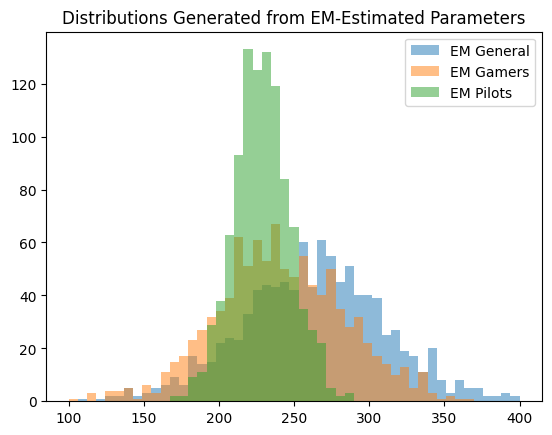

1  General pop.:  262.4264091835562 48.70165362543268  Gamers:  239.43751270239318 42.08029247192771  Pilots:  228.74948438634078 18.98133760211304


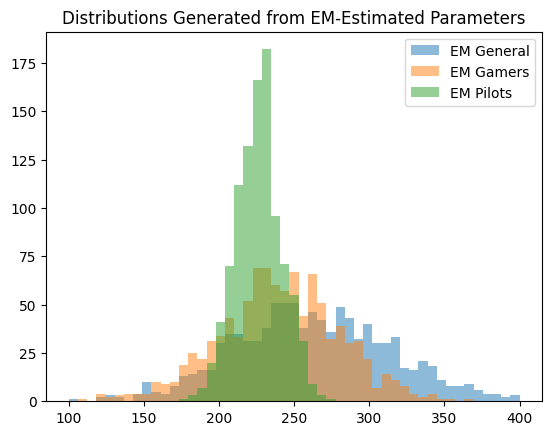

2  General pop.:  266.32011662387885 50.5154017383997  Gamers:  240.29352975034257 40.292105673383354  Pilots:  226.03354044723412 15.349056114504243


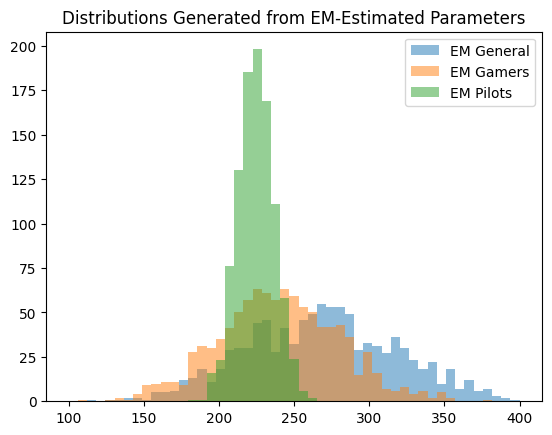

3  General pop.:  268.8107977012229 50.936829307577604  Gamers:  240.34151393194466 39.134628134989256  Pilots:  224.44937969082187 12.33128513234527


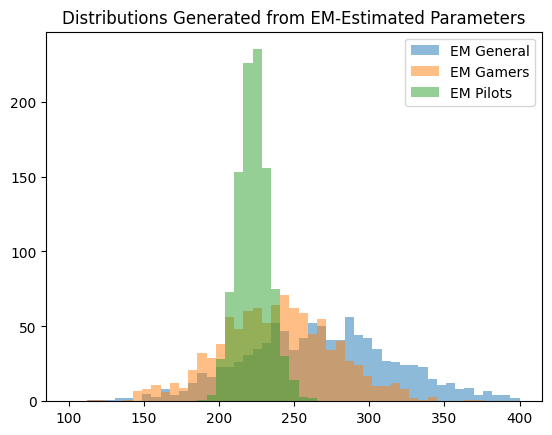

4  General pop.:  270.2760184933286 50.90489979575462  Gamers:  240.05285446580194 38.527193463502385  Pilots:  223.57020596690768 10.02239782593931


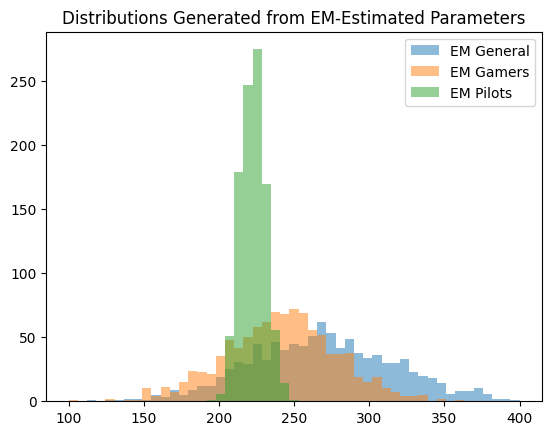

5  General pop.:  271.05964146220333 50.71745426290103  Gamers:  239.58341248043808 38.17610082160227  Pilots:  223.10912799701785 8.359112184201477


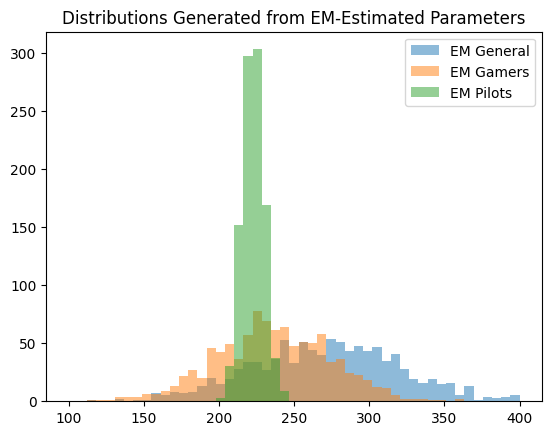

6  General pop.:  271.44756052546154 50.49935936473921  Gamers:  238.99405186276758 37.88456343361154  Pilots:  222.88376706340196 7.21669906074537


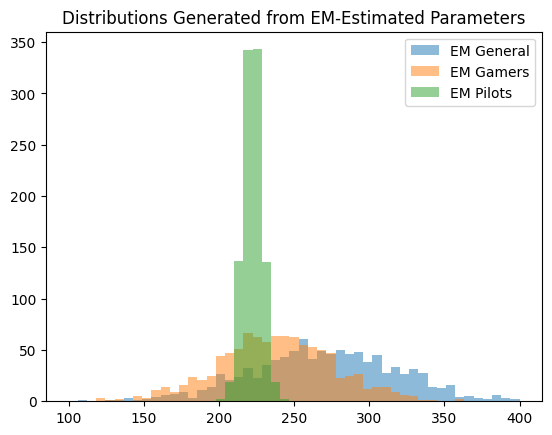

7  General pop.:  271.65538818101857 50.29578405307896  Gamers:  238.3444618236396 37.56216697798698  Pilots:  222.77684496097456 6.465328128698204


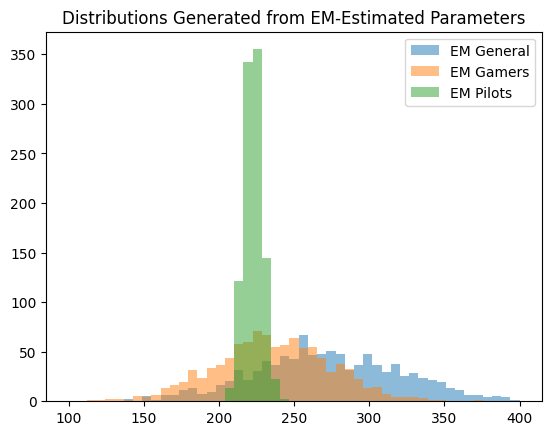

8  General pop.:  271.82074298691975 50.11801748164129  Gamers:  237.68400360532567 37.1954044905223  Pilots:  222.7249877916766 5.985769702711714


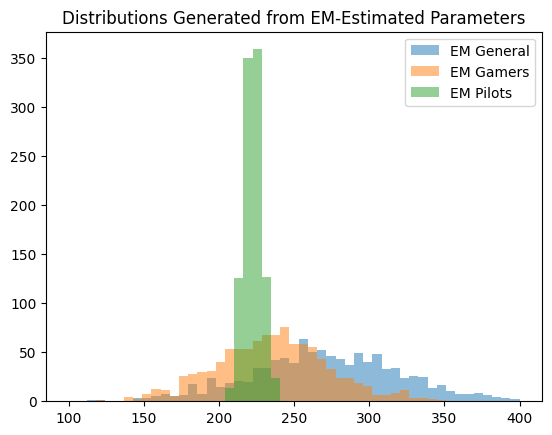

9  General pop.:  272.01308444739186 49.961495506231316  Gamers:  237.04265705792 36.80727086383971  Pilots:  222.70043610999966 5.682578368095808


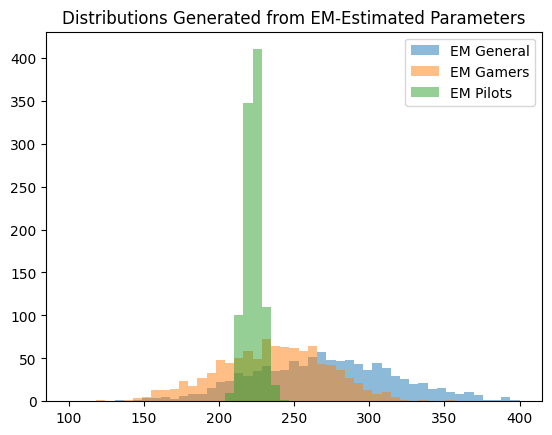

10  General pop.:  272.2533036220957 49.814483809305486  Gamers:  236.43490742913784 36.42546260514063  Pilots:  222.69028594472618 5.4897113279267185


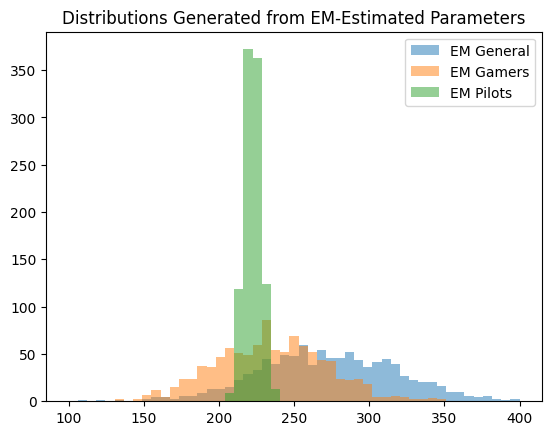

11  General pop.:  272.53606562962153 49.66610033426636  Gamers:  235.8657350346112 36.06921148045029  Pilots:  222.68757632308154 5.365298736819192


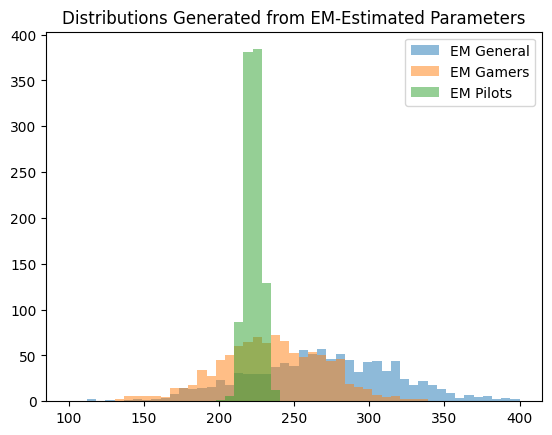

12  General pop.:  272.8471496758383 49.51011072509013  Gamers:  235.33551411097042 35.74799694949546  Pilots:  222.6884555949834 5.2836483264089456


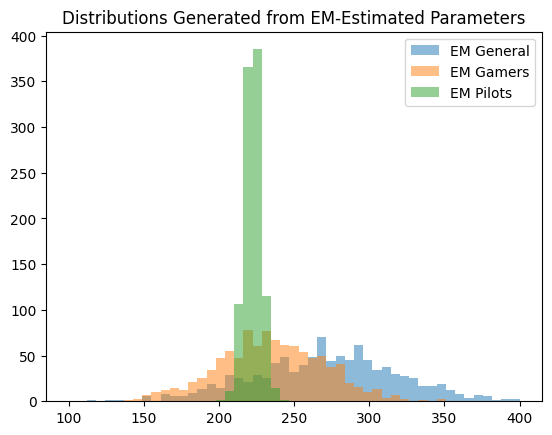

13  General pop.:  273.1724033604305 49.34480014689122  Gamers:  234.84281979011087 35.46421303561911  Pilots:  222.69089291578018 5.229046716756337


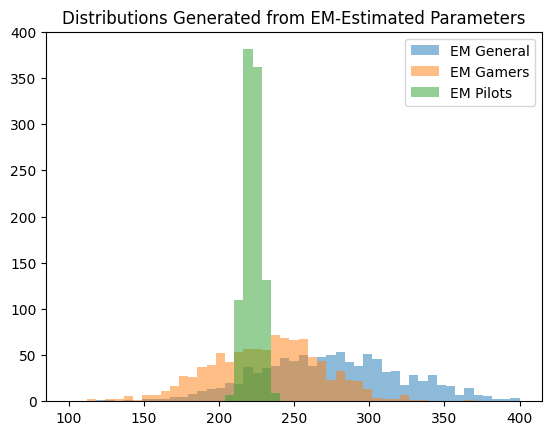

14  General pop.:  273.50073503216464 49.17138642750352  Gamers:  234.38563995175173 35.21610262166336  Pilots:  222.6938860789622 5.191801982386955


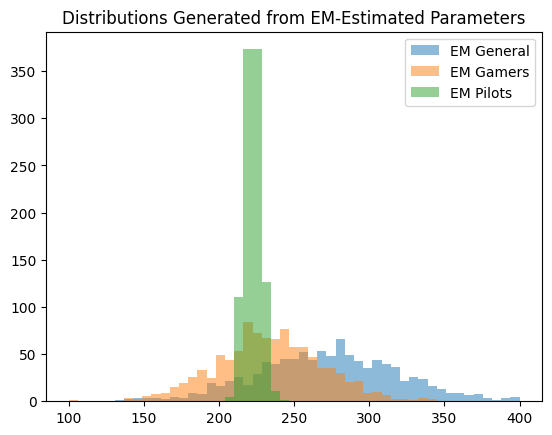

15  General pop.:  273.82435654255187 48.9924905388202  Gamers:  233.96181331675876 34.999923167570316  Pilots:  222.69697619117923 5.165863229083756


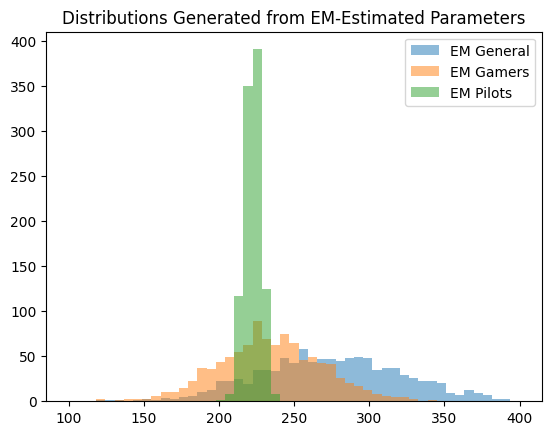

16  General pop.:  274.1381527490265 48.811108720934435  Gamers:  233.56917953544826 34.81129730632788  Pilots:  222.6999726596512 5.147403703554407


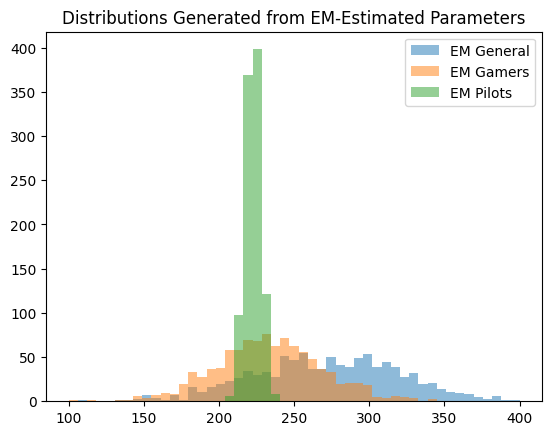

17  General pop.:  274.4389512729549 48.63004995801009  Gamers:  233.20563735065102 34.64595602087167  Pilots:  222.70280857379535 5.133971745619486


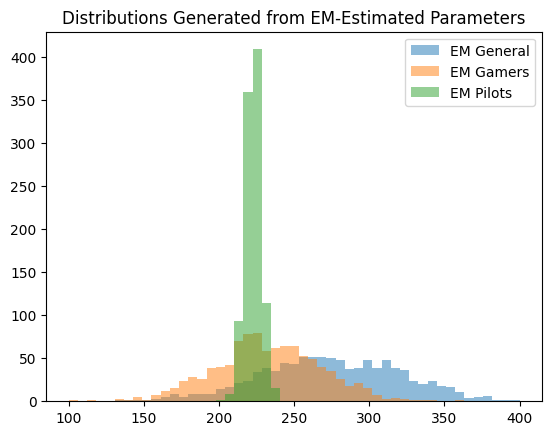

18  General pop.:  274.72492580299166 48.451687592954315  Gamers:  232.86917353785253 34.500089777561364  Pilots:  222.70546954767613 5.12397610896996


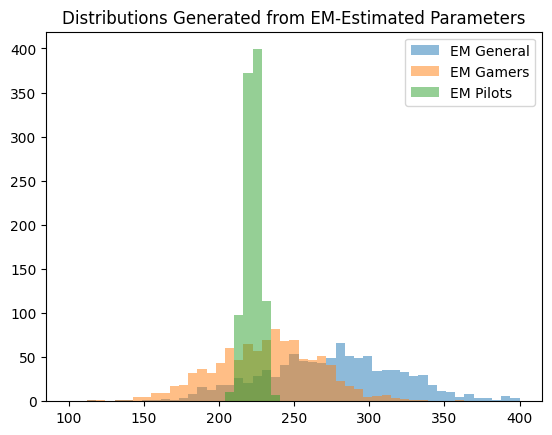

19  General pop.:  274.9951621138699 48.27789179374997  Gamers:  232.55787949817253 34.37046936196564  Pilots:  222.70796094353167 5.116370215787239


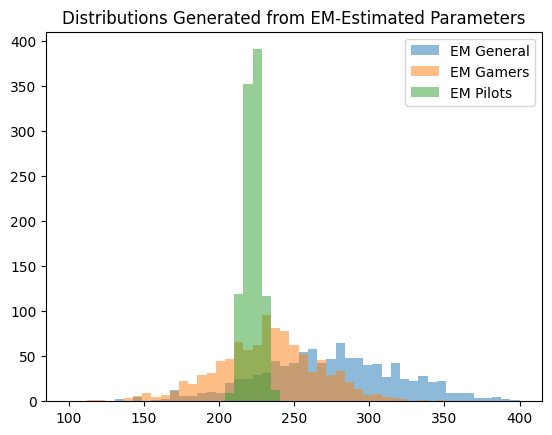

In [22]:

from scipy.stats import norm

# First, some initial guess of the parameter we do not know, mu for each class.
em_mean_general = 260 
em_std_general = 30 
em_mean_gamers = 250 
em_std_gamers = 30 
em_mean_pilots = 240 
em_std_pilots = 20

reaction_times = np.hstack([general_samples,gamer_samples,pilot_samples]) # Stack arrays in sequence horizontally (column wise).
np.random.shuffle(reaction_times)

for i in range(0,20): # iterate 20 times, remember EM is an iterative method.
    estimated_general_samples = [] 
    estimated_gamer_samples = [] 
    estimated_pilot_samples = [] 
    print(i," General pop.: ", em_mean_general, em_std_general," Gamers: ", em_mean_gamers, em_std_gamers," Pilots: ", em_mean_pilots, em_std_pilots)

    for r in reaction_times:  
        # E-step - use current model to estimate values for the hidden variable (class membership)
        # Your code goes here
        # Probability of r under each class (likelihoods)
        p_general = norm.pdf(r, em_mean_general, em_std_general)
        p_gamer   = norm.pdf(r, em_mean_gamers, em_std_gamers)
        p_pilot   = norm.pdf(r, em_mean_pilots, em_std_pilots)

        # Normalize to get "responsibilities"
        total = p_general + p_gamer + p_pilot
        w_general = p_general / total
        w_gamer   = p_gamer   / total
        w_pilot   = p_pilot   / total

        # Store weighted samples
        estimated_general_samples.append((w_general, r))
        estimated_gamer_samples.append((w_gamer, r))
        estimated_pilot_samples.append((w_pilot, r))

    # Convert to numpy arrays
    estimated_general_samples = np.array(estimated_general_samples)
    estimated_gamer_samples   = np.array(estimated_gamer_samples)
    estimated_pilot_samples   = np.array(estimated_pilot_samples)
    
    # M-step - using the estimated class values re-calculate the parameters of the model i.e the means 
    # Your code goes here
    # Update means and std deviations
    
    # General population
    weights = estimated_general_samples[:, 0]
    values  = estimated_general_samples[:, 1]
    em_mean_general = np.sum(weights * values) / np.sum(weights)
    em_std_general  = np.sqrt(np.sum(weights * (values - em_mean_general)**2) / np.sum(weights))

    # Gamers
    weights = estimated_gamer_samples[:, 0]
    values  = estimated_gamer_samples[:, 1]
    em_mean_gamers = np.sum(weights * values) / np.sum(weights)
    em_std_gamers  = np.sqrt(np.sum(weights * (values - em_mean_gamers)**2) / np.sum(weights))

    # Pilots
    weights = estimated_pilot_samples[:, 0]
    values  = estimated_pilot_samples[:, 1]
    em_mean_pilots = np.sum(weights * values) / np.sum(weights)
    em_std_pilots  = np.sqrt(np.sum(weights * (values - em_mean_pilots)**2) / np.sum(weights))
    
    # generate 1000 samples of each class 
    # Your code goes here
    em_general_samples = np.random.normal(em_mean_general, em_std_general, 1000)
    em_gamer_samples   = np.random.normal(em_mean_gamers, em_std_gamers, 1000)
    em_pilot_samples   = np.random.normal(em_mean_pilots, em_std_pilots, 1000)
    
    # PLOT EM-ESTIMATED DISTRIBUTIONS
    # Your code goes here
    bins = np.linspace(100, 400, 50)
    pyplot.hist(em_general_samples, bins, alpha=0.5, label='EM General')
    pyplot.hist(em_gamer_samples,   bins, alpha=0.5, label='EM Gamers')
    pyplot.hist(em_pilot_samples,   bins, alpha=0.5, label='EM Pilots')
    pyplot.legend(loc='upper right')
    pyplot.title("Distributions Generated from EM-Estimated Parameters")
    pyplot.show()

# QUESTION 5 (Advanced) - Multi-layer Perceptrons - 10 Marks

In this question, you are tasked with exploring the relationship between multi-layer perceptron architecture, optimizer, activation functions, and Error Rate.

The SciKitLearn toolset also has several datasets for practicing and developing your machine-learning approaches to very different types of data. We are going to consider the wine dataset, details here <https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-recognition-dataset>

You need to look at the shape of the data variable, it is easy to access training data in the form of data and targets. Use the sci-kit learn MLPClassifer to explore the following tasks (you will learn multiple classifiers)

1. Develop a simple accuracy function that takes in the entire dataset and its actual classification targets and returns the accuracy: $\frac{TP + TN}{TP + TN + FP + FN}$. Note we are purposefully going to ignore any sort of holdout test/train/validate split approach and we will test on the entire dataset itself to see how well the learned model classifies the dataset (*you would not normally do this*). HINT: It is possible to predict over the entire data set in one line of code, like so: *clf.predict(data.data)* where clf is of type MLPClassifier.
2. Use SciKitLearn's cross_validate to perform 10-Fold cross validation on a learned model. Make sure cv=10, scoring=('accuracy'). Take the mean and standard deviation of the 10 returned values.
3. Using MLP Classifier with the Adam solver, with random state = 1 for reproducibility, and max iterations at 10000. Assuming a two-layer MLP architecture, implement a simple grid search over activation functions (using activations below) on each layer size (width), i.e., hidden_layers_sizes=(L1,L2) where L1 and L2 are integers (using the layer_sizes below) for both layers trying to find a combination of layers sizes and activation function that produces the best accuracy. You should train and measure the accuracy of each model (300 models total) and output the results as

   ( *layer 1 size*, *layer 2 size* ) with *activation function* our accuracy: *accuracy from (1)*; cv mean accuracy: *mean accuracy from (2)*; cv accuracy std: *accuracy std from (2)*

   *see examples below*

4. Track the best performing models for both our accuracy taken over the whole dataset and the mean 10-fold cross validation. Output the two winners model information. Output the result as
Our Winning model: ( *layer 1 size*, *layer 2 size* ) with *activation function* : *accuracy from (1)*
CV Winning model:  ( *layer 1 size*, *layer 2 size* ) with *activation function* : *accuracy from (2)*
5. Go over the results from (2) and *for each* activation function try to find the smallest topology that gives good enough values. Often the goal is not necessarily perfect models, particularly when you are resource-constrained. Your goal is to first decide what good enough is and justify it, say, for example, some accuracy level, then find the best layer size combination that meets that requirement. Your goal is to find the *smallest* architecture with a *high* enough accuracy. You should report all three from your findings in the same way as before. You can output
   
Good enough model for ReLu\
( % , % ), with  relu : %\
Good enough model for tanh\
( %, % ), with  tanh : %\
Good enough model for logistic\
( % , % ), with  logistic : %

In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import cross_validate
data = load_wine()
X = data.data
y = data.target

def simple_accuracy(pred, actual):
    return np.sum(pred == actual) / len(actual)

# Your code goes here

layer_sizes = range(1,6)
activations = ['relu', 'tanh', 'logistic']

# YOUR CODE GOES HERE
our_accuracy_winner = -1
our_layer1_winner = None
our_layer2_winner = None
our_activation_winner = None

cv_accuracy_winner = -1
cv_layer1_winner = None
cv_layer2_winner = None
cv_activation_winner = None

# Store results for good-enough search
results = []

for activation in activations:
    for layer1 in layer_sizes:
        for layer2 in layer_sizes:
            # YOUR CODE GOES HERE
            clf = MLPClassifier(hidden_layer_sizes=(layer1, layer2),activation=activation,solver='adam',random_state=1,max_iter=10000)
            # Train model
            clf.fit(X, y)

            # OUR ACCURACY
            pred = clf.predict(X)
            our_acc = simple_accuracy(pred, y)

            # 10-FOLD CROSS VALIDATION
            cv_scores = cross_validate(clf, X, y, cv=10, scoring='accuracy')
            cv_mean = cv_scores['test_score'].mean()
            cv_std = cv_scores['test_score'].std()

            # Store for good enough search
            results.append({
                "L1": layer1,
                "L2": layer2,
                "activation": activation,
                "our_acc": our_acc,
                "cv_mean": cv_mean,
                "cv_std": cv_std
            })

            print(f"( {layer1} , {layer2} ), with {activation} our accuracy : {our_acc} ; "
                  f"cv mean accuracy: {cv_mean} ; cv accuracy std: {cv_std}")

            # Check OUR accuracy winner
            if our_acc > our_accuracy_winner:
                our_accuracy_winner = our_acc
                our_layer1_winner = layer1
                our_layer2_winner = layer2
                our_activation_winner = activation

            # Check CV accuracy winner
            if cv_mean > cv_accuracy_winner:
                cv_accuracy_winner = cv_mean
                cv_layer1_winner = layer1
                cv_layer2_winner = layer2
                cv_activation_winner = activation


# Note the following two lines are examples, you may store these values in your own way
print('Winning model: (', our_layer1_winner, ',', our_layer2_winner, '), with ', our_activation_winner, ' :', our_accuracy_winner)
print('Winning model: (', cv_layer1_winner, ',', cv_layer2_winner, '), with ', cv_activation_winner, ' :', cv_accuracy_winner)

# Example output (... is not the actual output just there are many lines here)
# ( 1 , 1 ), with  relu  our accuracy : 0.398876404494382 ; cv mean accuracy:  0.3993464052287582 ; cv accuracy std: 0.024707265583576204
# ( 1 , 2 ), with  relu  our accuracy : 0.398876404494382 ; cv mean accuracy:  0.3758169934640523 ; cv accuracy std: 0.02926616101599753
# ...
# Winning model: ( 5 , 4 ), with  logistic  : 1.0
# Winning model: ( 5 , 4 ), with  tanh  : 0.961111111111111

# Good enough model for ReLu
# ( % , % ), with  relu : %
# Good enough model for tanh
# ( %, % ), with  tanh : %
# Good enough model for logistic
# ( % , % ), with  logistic : %
GOOD_ENOUGH = 0.95

def find_good_enough(act):
    # filter by activation
    act_models = [r for r in results if r["activation"] == act]

    # filter by accuracy threshold
    good = [r for r in act_models if r["cv_mean"] >= GOOD_ENOUGH]

    if len(good) == 0:
        return None

    # choose smallest network (min L1 + L2)
    best = sorted(good, key=lambda x: x["L1"] + x["L2"])[0]
    return best

relu_good = find_good_enough("relu")
tanh_good = find_good_enough("tanh")
log_good  = find_good_enough("logistic")

print("\n============== GOOD ENOUGH MODELS ==============")

if relu_good:
    print(f"Good enough for ReLU: ( {relu_good['L1']} , {relu_good['L2']} ), with relu : {relu_good['cv_mean']}")
else:
    print("No good-enough model found for ReLU.")

if tanh_good:
    print(f"Good enough for tanh: ( {tanh_good['L1']} , {tanh_good['L2']} ), with tanh : {tanh_good['cv_mean']}")
else:
    print("No good-enough model found for tanh.")

if log_good:
    print(f"Good enough for logistic: ( {log_good['L1']} , {log_good['L2']} ), with logistic : {log_good['cv_mean']}")
else:
    print("No good-enough model found for logistic.")

( 1 , 1 ), with relu our accuracy : 0.398876404494382 ; cv mean accuracy: 0.3993464052287582 ; cv accuracy std: 0.024707265583576204
( 1 , 2 ), with relu our accuracy : 0.398876404494382 ; cv mean accuracy: 0.3758169934640523 ; cv accuracy std: 0.02926616101599753
( 1 , 3 ), with relu our accuracy : 0.33146067415730335 ; cv mean accuracy: 0.33137254901960783 ; cv accuracy std: 0.01372549019607843
( 1 , 4 ), with relu our accuracy : 0.398876404494382 ; cv mean accuracy: 0.3993464052287582 ; cv accuracy std: 0.024707265583576204
( 1 , 5 ), with relu our accuracy : 0.398876404494382 ; cv mean accuracy: 0.3993464052287582 ; cv accuracy std: 0.024707265583576204
( 2 , 1 ), with relu our accuracy : 0.398876404494382 ; cv mean accuracy: 0.3993464052287582 ; cv accuracy std: 0.024707265583576204
( 2 , 2 ), with relu our accuracy : 0.6460674157303371 ; cv mean accuracy: 0.6415032679738563 ; cv accuracy std: 0.06703808493293249
( 2 , 3 ), with relu our accuracy : 0.33146067415730335 ; cv mean ac